# Fonctionnalités de base

## 1. Modules Python.
On va importer les modules python qui seront très utiles pour la suite.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Python modules
import math
import cv2
import matplotlib.pyplot as plt
import time
import numpy

## 2. Charger une image.
Utilisez la fonction imread du module cv2 pour ouvrir une image de votre choix.

In [ ]:
#Charger une Image
I=cv2.imread('/content/drive/MyDrive/7_4_1.jpg')

In [ ]:
I.shape, type(I), type(I[0,0,0])

((875, 1200, 3), numpy.ndarray, numpy.uint8)

In [ ]:
I=I[:,:,0]

## 3. Première fonction
Ecrivez une fonction qui charge une image et la convertit en python array de type float (utiliser une méthode de numpy pour la conversion).

In [ ]:
def loadImage(filename):
    I=cv2.imread('/content/drive/MyDrive/7_4_1.jpg')
    I=numpy.float64(I)
    return I

## 4. Affichage d'image

On donne cette fonction pour visualiser des images de type float.

In [ ]:
def showImage(I,scale=1):
    plt.imshow(I,cmap='gray')
    plt.axis('off')
    size=plt.gcf().get_size_inches()
    plt.gcf().set_size_inches(scale*size)

a) Affichez une image à l'aide de la fonction précédente.

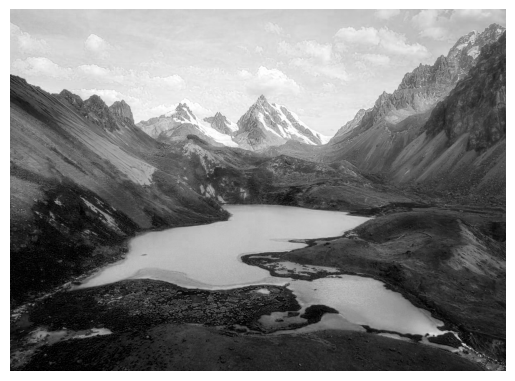

In [ ]:
showImage(I)

b) Affichez la même image avec une autre carte de couleur, par exemple jet

In [ ]:
def showImage(I, scale=1, cmap='gray'):
    plt.imshow(I, cmap=cmap)
    plt.axis('off')
    size = plt.gcf().get_size_inches()
    plt.gcf().set_size_inches(scale * size)

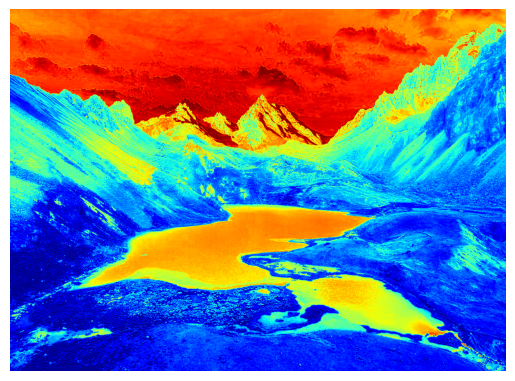

In [ ]:
showImage(I, scale=1, cmap='jet')

# Equation de la chaleur

## 5. Laplacien

En utilisant une fonctionnalité de OpenCV (cv2), appliquez un filtre laplacien sur une image. Vous ferez particulièrement attention aux paramètres de la fonction utilisée.

In [ ]:
#Filtre laplacien
laplacian_I=cv2.Laplacian(I,cv2.CV_64F,ksize=1)

In [ ]:
laplacian_I = numpy.uint8(numpy.absolute(laplacian_I))


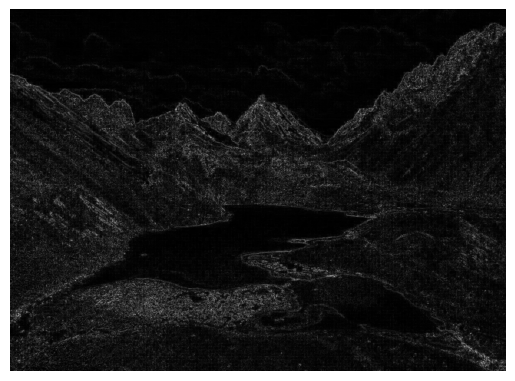

In [ ]:
showImage(laplacian_I)

In [ ]:
laplacian_I

array([[ 0,  2,  2, ...,  0,  3,  4],
       [ 4,  1,  0, ...,  3,  1,  3],
       [ 1,  1,  2, ...,  1,  0,  2],
       ...,
       [48,  4, 26, ..., 55, 29,  1],
       [17, 17,  5, ..., 38, 10, 37],
       [22, 10,  4, ..., 81, 12, 84]], dtype=uint8)

## 6. Discrétisation
Ecrivez une fonction qui implémente l'équation de la chaleur

In [ ]:
def HeatEquation(I, dt, n):
    smoothedI = I.astype(numpy.float64)
    for _ in range(n):
        I_xx = numpy.roll(smoothedI, 1, axis=1) - 2 * smoothedI + numpy.roll(smoothedI, -1, axis=1)  # Dérivée en x
        I_yy = numpy.roll(smoothedI, 1, axis=0) - 2 * smoothedI + numpy.roll(smoothedI, -1, axis=0)  # Dérivée en y
        smoothedI += dt * (I_xx + I_yy)

    return smoothedI

Testez la fonction avec différents paramètres comme vus en cours.  
Affichez l'image résultat à chaque fois et vérifiez que tout est bien cohérent.  
Que donne votre fonction avec dt=0.26 ?

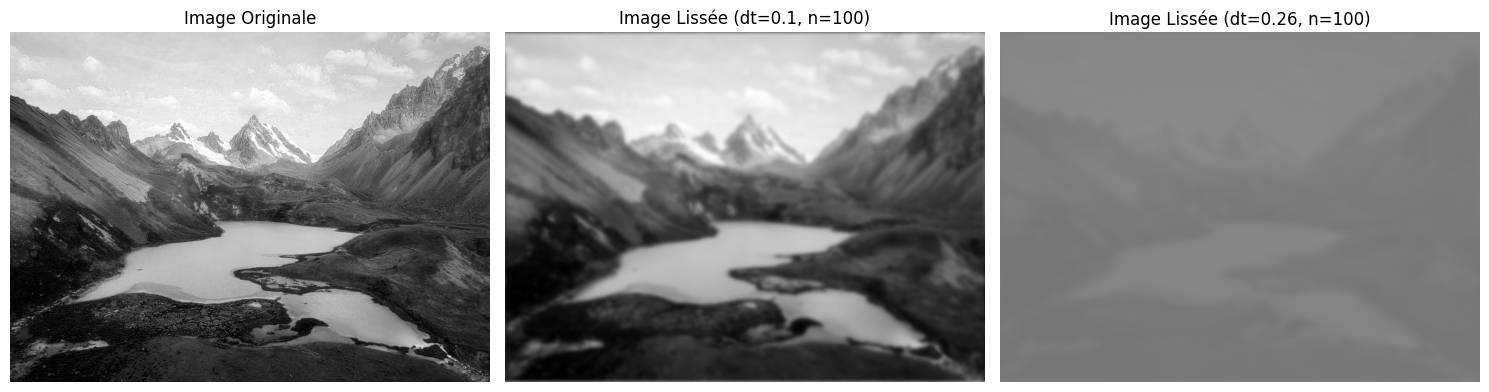

In [34]:
# Appliquer l'équation de la chaleur avec dt=0.1
dt1 = 0.1
n1 = 100
smoothedI1 = HeatEquation(I, dt1, n1)

# Appliquer l'équation de la chaleur avec dt=0.26
dt2 = 0.26
n2 = 100
smoothedI2 = HeatEquation(I, dt2, n2)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Image Originale')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(smoothedI1, cmap='gray')
plt.title(f'Image Lissée (dt={dt1}, n={n1})')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(smoothedI2, cmap='gray')
plt.title(f'Image Lissée (dt={dt2}, n={n2})')
plt.axis('off')
plt.tight_layout()
plt.show()

## 7. Filtre gaussien sur une image
Appliquez un filtre gaussien sur une image en utilisant la fonction $\texttt{GaussianBlur}$ de $\texttt{openCV}$.

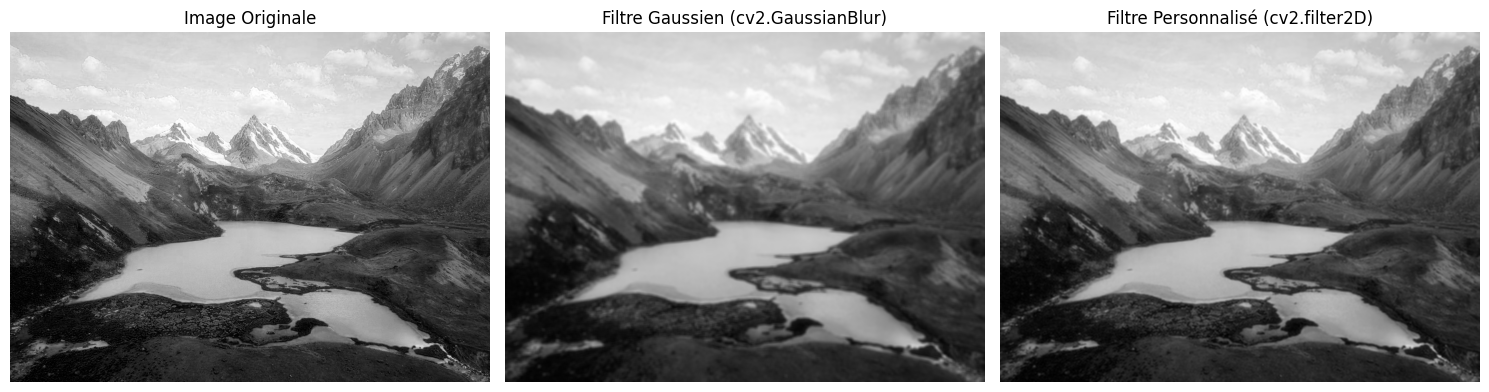

In [35]:
# Appliquer un filtre gaussien avec cv2.GaussianBlur
ksize = (5, 5)
sigma = 10
blur_I2 = cv2.GaussianBlur(I, ksize, sigma)

# Appliquer un filtre gaussien personnalisé avec cv2.filter2D
kernel_size = 9
sigma = 5
kernel = cv2.getGaussianKernel(kernel_size, sigma)
kernel_2D = kernel @ kernel.T
blur_I = cv2.filter2D(I, -1, kernel_2D)

# Convert the image to uint8 before color conversion
I_uint8 = I.astype(numpy.uint8)
blur_I_uint8 = blur_I.astype(numpy.uint8)
blur_I2_uint8 = blur_I2.astype(numpy.uint8)

# Convertir les images de BGR (OpenCV) à RGB (Matplotlib)
I_rgb = cv2.cvtColor(I_uint8, cv2.COLOR_BGR2RGB)
blur_I_rgb = cv2.cvtColor(blur_I_uint8, cv2.COLOR_BGR2RGB)
blur_I2_rgb = cv2.cvtColor(blur_I2_uint8, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I_rgb)
plt.title('Image Originale')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blur_I_rgb)
plt.title('Filtre Gaussien (cv2.GaussianBlur)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(blur_I2_rgb)
plt.title('Filtre Personnalisé (cv2.filter2D)')
plt.axis('off')
plt.tight_layout()
plt.show()

# Pour les memes parametres

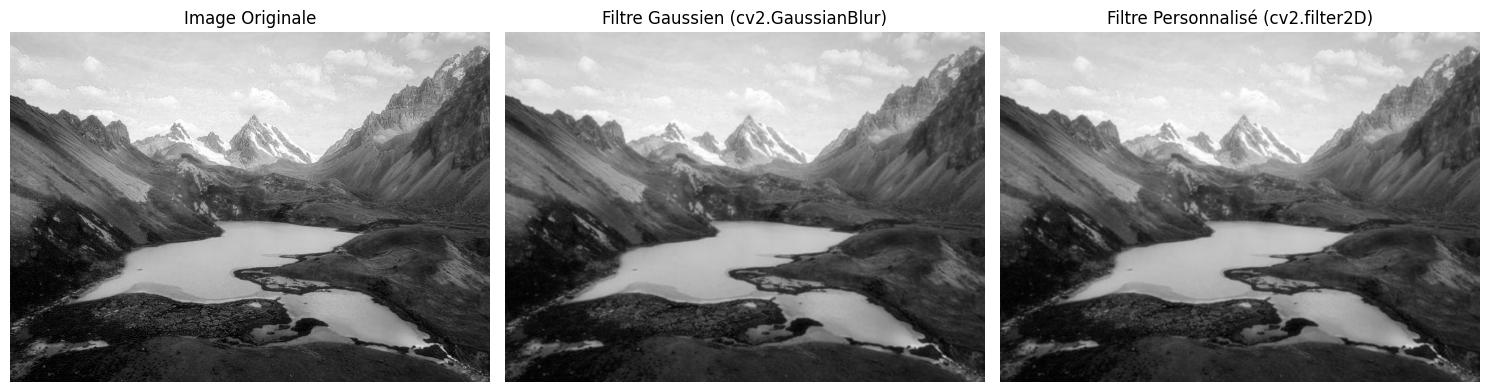

In [36]:
ksize = (5, 5)
sigma = 1.5
blur_I2 = cv2.GaussianBlur(I, ksize, sigma)

# Appliquer un filtre gaussien personnalisé avec cv2.filter2D
kernel_size = 5
sigma = 1.5
kernel = cv2.getGaussianKernel(kernel_size, sigma)
kernel_2D = kernel @ kernel.T
blur_I = cv2.filter2D(I, -1, kernel_2D)
I_uint8 = I.astype(numpy.uint8)
blur_I_uint8 = blur_I.astype(numpy.uint8)
blur_I2_uint8 = blur_I2.astype(numpy.uint8)
I_rgb = cv2.cvtColor(I_uint8, cv2.COLOR_BGR2RGB)
blur_I_rgb = cv2.cvtColor(blur_I_uint8, cv2.COLOR_BGR2RGB)
blur_I2_rgb = cv2.cvtColor(blur_I2_uint8, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I_rgb)
plt.title('Image Originale')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blur_I_rgb)
plt.title('Filtre Gaussien (cv2.GaussianBlur)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(blur_I2_rgb)
plt.title('Filtre Personnalisé (cv2.filter2D)')
plt.axis('off')
plt.tight_layout()
plt.show()

***Remarques***

*   Avec un sigma élevé (10), les deux filtres produisent un flou très prononcé.
*   La taille du noyau (ksize ou kernel_size) influence également l'intensité du flou. Un noyau plus grand produit un flou plus étendu.

Les deux méthodes (cv2.GaussianBlur et cv2.filter2D) sont mathématiquement équivalentes si le noyau gaussien est identique. Cependant, cv2.GaussianBlur est optimisé pour les filtres gaussiens, tandis que cv2.filter2D est plus général.

## 8. Comparaison EDP/Filtre
En choisissant les bons paramètres, montrez l'équivalence vue en cours entre filtre gaussien et équation de la chaleur.

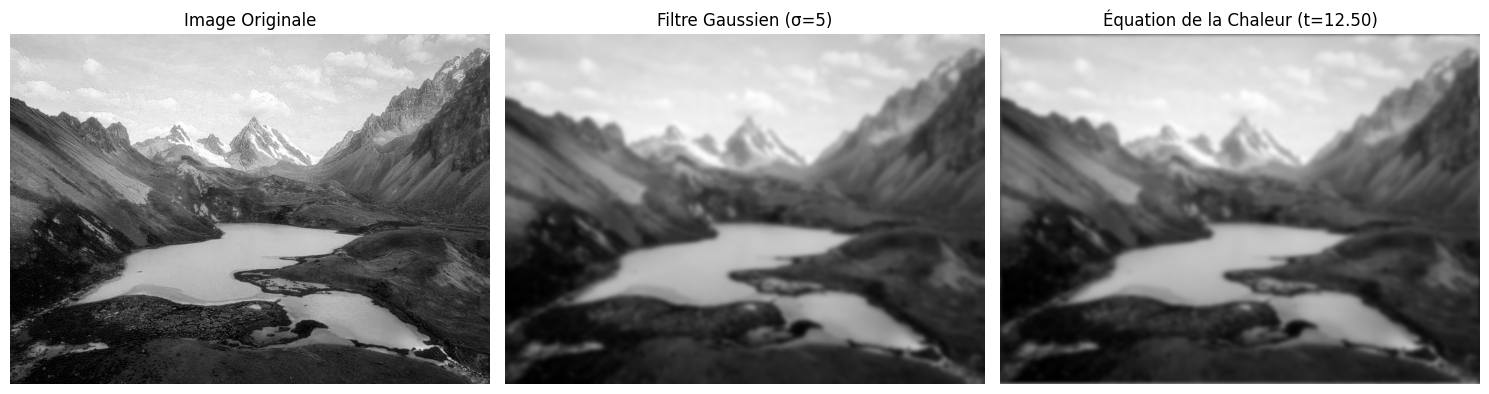

In [37]:

sigma = 5
ksize = (25, 25)
blur_I = cv2.GaussianBlur(I, ksize, sigma)
alpha = 1  # Coefficient de diffusion
t = (sigma**2) / (2 * alpha)  # Temps correspondant à sigma
dt = 0.1  # Pas de temps pour la discrétisation
n = int(t / dt)  # Nombre d'itérations
smoothedI = HeatEquation(I, dt, n)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Image Originale')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blur_I, cmap='gray')
plt.title(f'Filtre Gaussien (σ={sigma})')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(smoothedI, cmap='gray')
plt.title(f'Équation de la Chaleur (t={t:.2f})')
plt.axis('off')
plt.tight_layout()
plt.show()

Les deux images filtrées (filtre gaussien et équation de la chaleur)  très similaires, démontrant ainsi l'équivalence entre les deux méthodes.

# Modèle de Malik et Perona

## 9. Dérivée directionnelle
Ecrire une fonction qui donne les 4 filtres 3x3 vus en cours

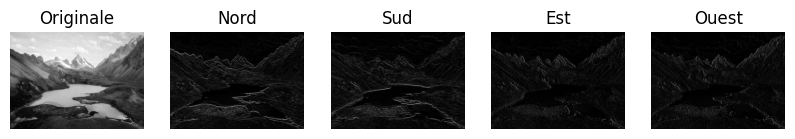

In [39]:
# Définition des filtres directionnels
def gradientDir(direction):
    if direction == "N":  # Nord
        return numpy.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    elif direction == "S":  # Sud
        return numpy.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    elif direction == "E":  # Est
        return numpy.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    elif direction == "W":  # Ouest
        return numpy.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    else:
        raise ValueError("Direction invalide. Utiliser 'N', 'S', 'E' ou 'W'.")

# Appliquer un filtre à une image
def applyGradient(I, direction):
    kernel = gradientDir(direction)
    return cv2.filter2D(I, -1, kernel)

# Fonction pour afficher plusieurs images
def showImages(images, titles):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.axis("off")
        plt.title(titles[i])
    plt.show()
# Appliquer les filtres directionnels
grad_N = applyGradient(I, "N")
grad_S = applyGradient(I, "S")
grad_E = applyGradient(I, "E")
grad_W = applyGradient(I, "W")

showImages([I, grad_N, grad_S, grad_E, grad_W],
           ["Originale", "Nord", "Sud", "Est", "Ouest"])


La dérivée directionnelle permet d’extraire les contours d’une image dans différentes directions (Nord, Sud, Est, Ouest). Ces filtres sont des masques de convolution qui calculent l’intensité du gradient dans chaque direction.


*   Nord (N):Détecte les variations verticales vers le haut
*   Sud (S):Détecte les variations verticales vers le bas


*   Est (E):Détecte les contours verticaux vers la droite
*  Ouest (W): Détecte les contours verticaux vers la gauche





## 10. Fonctions agissant sur la norme du gradient
a. Définissez les deux fonctions $f_1:(x,\lambda)\rightarrow \exp(-(x/\lambda)^2)$ et $f_2:(x,\lambda)\rightarrow 1/(1+(x/\lambda)^2))$

In [84]:
f1 = numpy.vectorize(lambda x,lam: 1/(1+(x/lam)**2),excluded='lam')
f2 = numpy.vectorize(lambda x,lam: numpy.exp(-(x/lam)**2),excluded='lam')

b. Visualisez la courbe de $f_1$ et $f_2$ pour différentes valeurs de $\lambda$

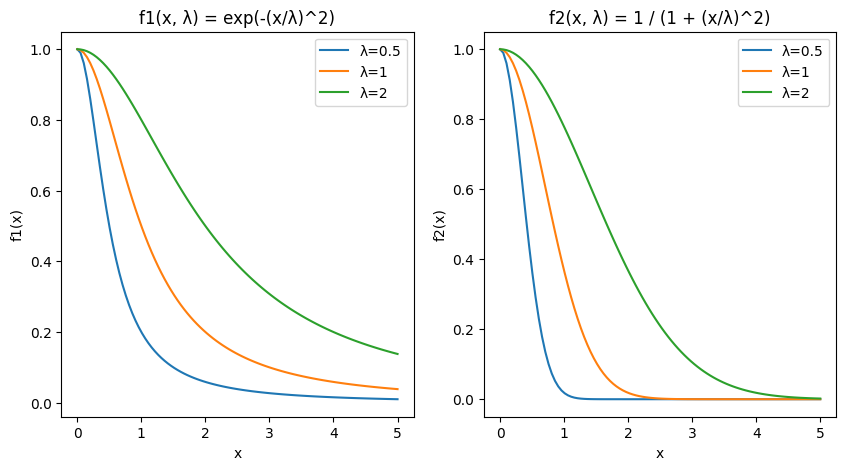

In [87]:
x = numpy.linspace(0, 5, 100)  # Valeurs de x
lambdas = [0.5, 1, 2]  # Différentes valeurs de λ

plt.figure(figsize=(10, 5))

# Tracé de f1
plt.subplot(1, 2, 1)
for lambd in lambdas:
    plt.plot(x, f1(x, lambd), label=f"λ={lambd}")
plt.title("f1(x, λ) = exp(-(x/λ)^2)")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.legend()

# Tracé de f2
plt.subplot(1, 2, 2)
for lambd in lambdas:
    plt.plot(x, f2(x, lambd), label=f"λ={lambd}")
plt.title("f2(x, λ) = 1 / (1 + (x/λ)^2)")
plt.xlabel("x")
plt.ylabel("f2(x)")
plt.legend()

plt.show()


Effet de 𝜆 sur 𝑓1

λ petit (ex: 𝜆=0.5)

Atténuation très forte des gradients élevés.
Lissage excessif → les contours disparaissent presque totalement.
Seuls les gradients faibles sont conservés.
𝜆

*  λ grand (ex : 𝜆=2)

Les fortes variations sont moins atténuées.
Plus de détails sont visibles.
Effet de lissage plus modéré, conservant les bords principaux.

👉 Interprétation :
𝑓
1  avec un λ trop petit efface trop d’informations, alors qu’un λ plus grand conserve mieux les contours.
f2 est plus doux que 𝑓1 , et même avec un petit
𝜆, il ne supprime pas complètement les contours.

c. Appliquez la fonction $f_1$ ou $f_2$ aux dérivées directionnelles de l'image. On veut ensuite visualiser les différents $f(|\nabla_X I(x,y)|)$

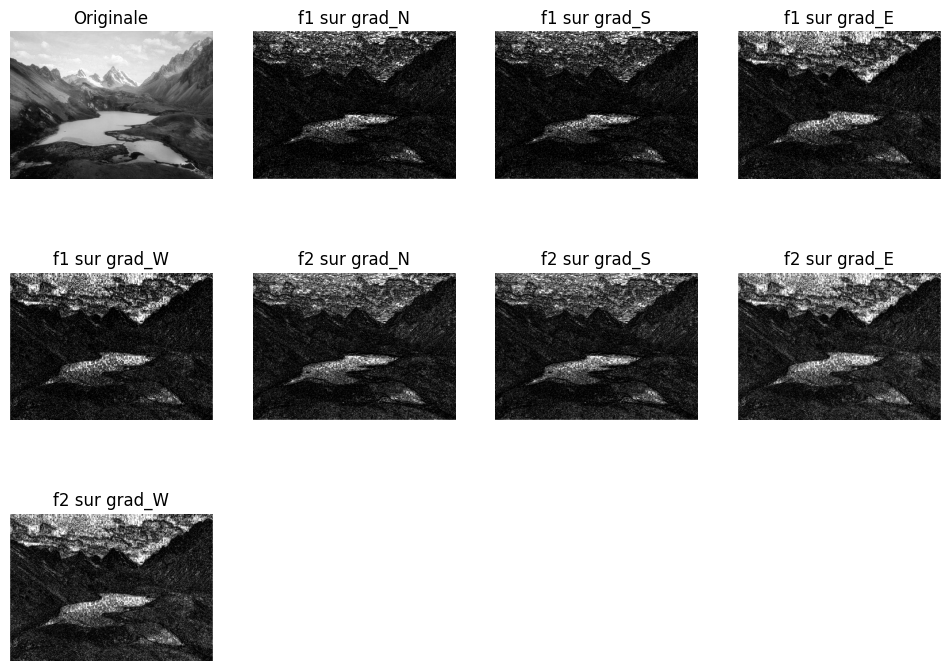

In [50]:
# Choisir une valeur de lambda
lambda_value = 2.5

# Appliquer f1 et f2 aux gradients directionnels absolus
filtered_f1_N = f1(np.abs(grad_N), lambda_value)
filtered_f1_S = f1(np.abs(grad_S), lambda_value)
filtered_f1_E = f1(np.abs(grad_E), lambda_value)
filtered_f1_W = f1(np.abs(grad_W), lambda_value)

filtered_f2_N = f2(np.abs(grad_N), lambda_value)
filtered_f2_S = f2(np.abs(grad_S), lambda_value)
filtered_f2_E = f2(np.abs(grad_E), lambda_value)
filtered_f2_W = f2(np.abs(grad_W), lambda_value)

# Fonction pour afficher plusieurs images
def showImages(images, titles):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.axis("off")
        plt.title(titles[i])
    plt.show()

# Afficher les résultats
images = [
    I,
    filtered_f1_N, filtered_f1_S, filtered_f1_E, filtered_f1_W,
    filtered_f2_N, filtered_f2_S, filtered_f2_E, filtered_f2_W
]

titles = [
    "Originale",
    "f1 sur grad_N", "f1 sur grad_S", "f1 sur grad_E", "f1 sur grad_W",
    "f2 sur grad_N", "f2 sur grad_S", "f2 sur grad_E", "f2 sur grad_W"
]

showImages(images, titles)

📌 Gradients directionnels (∇X I) :
 Mettent en évidence les changements d'intensité dans les quatre directions (N, S, E, W).

📌 f1 appliqué aux gradients :
- Atténue les variations fortes, en mettant plus en valeur les petites variations.

📌 f2 appliqué aux gradients :
 - Réduit l'impact des forts gradients tout en conservant plus de détails que f1.


## 11. Méthode de Malik et Perona
a. Ecrivez la fonction principale qui applique le lissage anisotrope à une image d'entrée I.

In [96]:
def MalikPerona(I, dt, n, f, lambda_value):
    smoothedI = numpy.copy(I)
    for i in range(n):
        print(i)
        var_I = numpy.zeros(I.shape)
        for direction in ['N', 'W', 'E', 'S']:
            kernel = gradientDir(direction)
            gradientI = cv2.filter2D(smoothedI, -1, kernel)
            var_I += f(gradientI, lambda_value) * gradientI
        smoothedI = smoothedI + dt * var_I
    return smoothedI

b. Visualisez les images résultat (attention, ne pas dépasser n=30 itérations pour le moment)

0
1
2
3
4
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


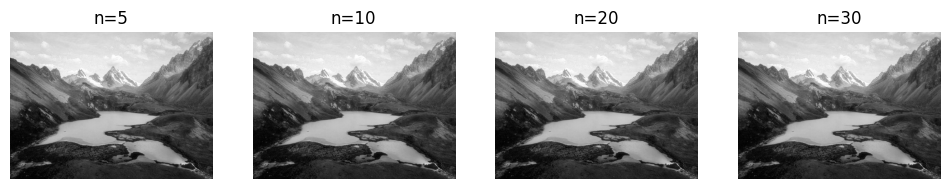

In [99]:
# Tester différentes valeurs de n
n_values = [5, 10, 20, 30]
filtered_images = []
titles = []

for n in n_values:
    Malik_I = MalikPerona(I, dt, n, f1, lambda_value)
    filtered_images.append(Malik_I)
    titles.append(f"n={n}")
showImages(filtered_images, titles)


🔹 Pour 𝑛 faible (ex: 5 ou 10) → L'effet de filtrage est léger, les contours restent visibles.

🔹 Pour 𝑛 plus grand (ex: 20 ou 30) → Le lissage devient plus prononcé, certains détails fins peuvent disparaître.

Si 𝑛 est trop grand, l'image risque de devenir trop floue !